概率机器人第三章第一题答案


In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np


(a)
最小的状态向量为 $X=\begin{bmatrix} x_{t} \\ \dot{x_{t}}\end{bmatrix}$

(b)
状态转移方程：$ X_{t}=AX_{t-1}+Bu_{t}+ \varepsilon_{t} $  
状态转移概率：$ p(x_{t}|u_{t},x_{t-1})=det\left (2\pi R_{t}  \right )^{-\frac{1}{2}}
exp\left \{
    \left( X_{t}-AX_{t-1}-Bu_{t} \right )^{T}R^{-1} \left( X_{t}-AX_{t-1}-Bu_{t} \right )
 \right \} $  
 其中  
 $A=\begin{bmatrix} 1 & 1 \\ 0 & 1 \\ \end{bmatrix}$  
 $B=\begin{bmatrix} \frac{1}{2} \\ 1  \end{bmatrix}$  
 由于假设了加速度符合均值为0，方差为1的高斯分布，因此有  
 $R_{t}=E((Bu+{t}-E(Bu+{t}))(Bu+{t}-E(Bu+{t}))^{T})=\sigma^{2}BB^{T}$

 




In [13]:
A = np.array([[1,1],[0,1]])
B = np.array([[1/2],[1]])
miu0 = np.array([[0],[0]])
u0 = np.array([0])
Rt = np.dot(B,B.T)
print("A=",A)
print("B=",B)
print("miu0=",miu0)
print("u0=",u0)
print("R:",Rt)

A= [[1 1]
 [0 1]]
B= [[0.5]
 [1. ]]
miu0= [[0]
 [0]]
u0= [0]
R: [[0.25 0.5 ]
 [0.5  1.  ]]


(c)卡尔曼的预测步骤为  
$ \bar{ \mu }_{t}=A_{t}\mu_{t-1}+B_{t}u_{t} $  
$ \bar{ \Sigma}_{t}=A_{t}\Sigma_{t-1}A_{t}^{T}+R_{t}$ 
其中，由于卡尔曼滤波假设了状态$X_{t}$是高斯分布的  
且题目中明确其均值为0，方差为1
因此有  
$\mu_{0}=E(X_{t})$  
$\Sigma_{0}=E((X_{t}-E(X_{t}))(X_{t}-E(X_{t}))^{T})=R_{t}$


In [22]:
miu = miu0
R = Rt
u = u0
sigma = Rt

for i in range(1,6):
    miu = np.dot(A,miu)+B*u
    sigma = np.dot(np.dot(A,sigma),A.T)+R
    print("miu",i,":\n",miu)
    print("sigma",i,":\n",sigma)


miu 1 :
 [[0.]
 [0.]]
sigma 1 :
 [[2.5 2. ]
 [2.  2. ]]
miu 2 :
 [[0.]
 [0.]]
sigma 2 :
 [[8.75 4.5 ]
 [4.5  3.  ]]
miu 3 :
 [[0.]
 [0.]]
sigma 3 :
 [[21.  8.]
 [ 8.  4.]]
miu 4 :
 [[0.]
 [0.]]
sigma 4 :
 [[41.25 12.5 ]
 [12.5   5.  ]]
miu 5 :
 [[0.]
 [0.]]
sigma 5 :
 [[71.5 18. ]
 [18.   6. ]]


(d)画出不确定性椭圆



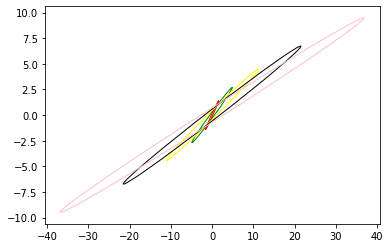

In [38]:
miu = miu0
R = Rt
u = u0
sigma = Rt


def plot_conversion_ellopse(mean,cov,ax,color='blue',n_std=2):
    eigvals, eigvecs = np.linalg.eigh(cov)
    anglel = np.arctan(-eigvecs[0,0]/eigvecs[1,0])*180.0/3.1415926
    ellipse = Ellipse(xy=(miu[0,0],miu[1,0]), width=eigvals[1], height=eigvals[0], angle=anglel, edgecolor=color, facecolor='none')
    ax.add_patch(ellipse)



fix = plt.figure()
ax = fix.add_subplot(111)

color_que = ['blue','red','green','yellow','black','pink']

for i in range(1,6):
    miu = np.dot(A,miu)+B*u
    sigma = np.dot(np.dot(A,sigma),A.T)+R
    eigen_value, eigen_vector = np.linalg.eig(sigma)
    # ell1 = Ellipse(xy = (miu[0,0], miu[1,0]), width = eigen_value[1], height = eigen_value[0], angle = np.arctan(-eigen_vector[0,0]/eigen_vector[1,0])*180.0/3.1415926, facecolor='yellow', alpha=0.3)
    # ax.add_patch(ell1)
    plot_conversion_ellopse(miu,sigma,ax,color=color_que[i])
plt.autoscale()
plt.show()

(e)
随着$t\rightarrow \infty$,$X_{t}$与$\dot{X}_{t}$间的相关性变得越来越不确定，反映在图上就是不确定性椭圆越来越大